In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dataset
from sklearn.preprocessing import MinMaxScaler

In [3]:
forex_data = pd.read_csv('EURUSD.I240.csv')
forex_data.columns = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
forex_data = forex_data[['Date', 'Time', 'Open', 'High', 'Low', 'Close']]

In [4]:
forex_data.head()

,Date,Time,Open,High,Low,Close
0,2010.09.09,00:00,1.27231,1.27418,1.27158,1.27254
1,2010.09.09,04:00,1.27251,1.27306,1.26889,1.26929
2,2010.09.09,08:00,1.26927,1.27351,1.26645,1.27150
3,2010.09.09,12:00,1.27152,1.27654,1.27080,1.27446
4,2010.09.09,16:00,1.27447,1.27474,1.26864,1.26914


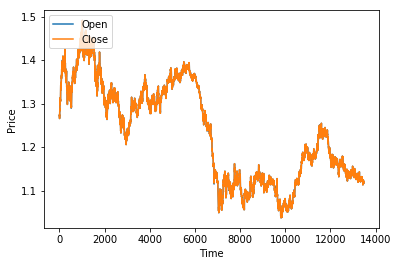

In [5]:
dataset.plot_data(forex_data)

In [6]:
close_data = forex_data.Close


In [7]:
scaler = MinMaxScaler()
close_data = close_data.values.reshape(close_data.shape[0], 1)
close_data = scaler.fit_transform(close_data)

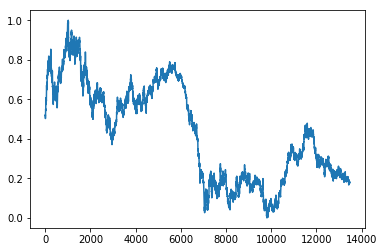

In [11]:
plt.plot(close_data)

In [12]:
X,y = dataset.process_data(close_data,20)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

10763
2691
10763
2691


In [17]:
X_train.shape

(10763, 20)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [19]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(20,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 10763 samples, validate on 2691 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/15


InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

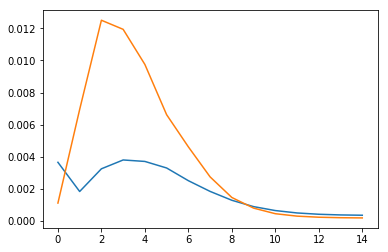

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

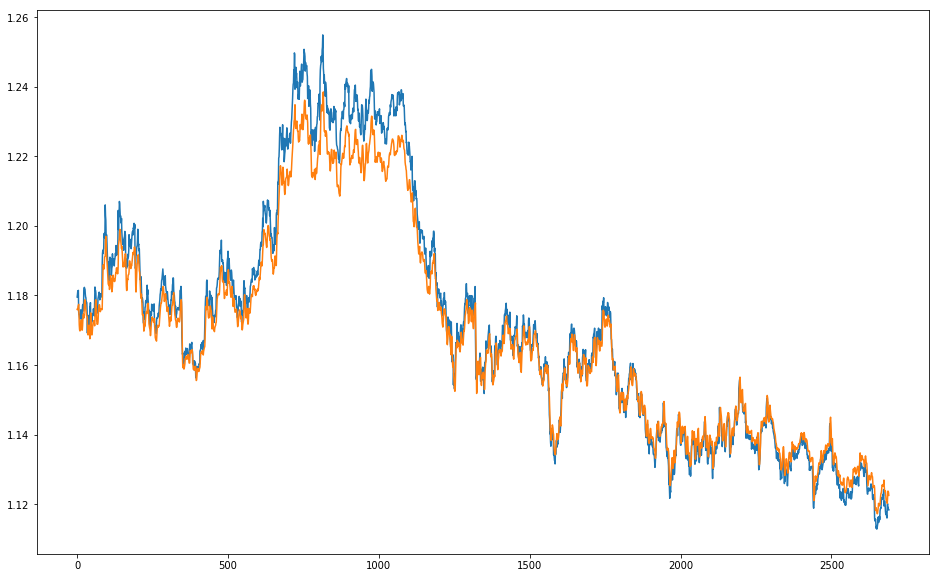

In [24]:
Xt = model.predict(X_test)
plt.figure(figsize=(16, 10))
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scaler.inverse_transform(Xt))
